In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/everyday-data-science/Data_Science_Projects/main/Sony%20Research/Data/Data_Science_Challenge.csv'
df = pd.read_csv(url)
df_copy = df.copy()

Initial suspection

In [3]:
df.head(4)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [4]:
df.columns.nunique()
df.shape

(3333, 21)

In [5]:
df['churn'].value_counts()


churn
False    2850
True      483
Name: count, dtype: int64

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# check duplicate values as well
df.duplicated().sum()

0

In [11]:
#describe for categorical 
# Looking at this we can see not many people have intnl plans , no voice mail plans
df.describe(include=object)

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


In [12]:
df.select_dtypes(include='number')

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [13]:
#outlier detection
def outlier_detection(data):
    outlier_count = []
    for column in data.select_dtypes(include='number'):
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3-q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column] < lower_bound)|(data[column] > upper_bound)]
        outlier_count.append({'columns':column,'no_of_outliers':outliers.shape[0]})
    return pd.DataFrame(outlier_count)


In [14]:
s = outlier_detection(df)

In [15]:
s

,columns,no_of_outliers
0,account length,18
1,area code,0
2,number vmail messages,1
3,total day minutes,25
4,total day calls,23
5,total day charge,25
6,total eve minutes,24
7,total eve calls,20
8,total eve charge,24
9,total night minutes,30


Conclusions after intitial inspection
1. lots of outliers
2. no misisng data
3. no duplicates
4. area code is not intrepreted correct
5. WV state dominates
6. majority of people do not have an intl plan & voice mail plan
7. the class to be predicted is highly imbalanced hence accuracy will not be a good metric

**Data preprocessing**

removing of unwanted cols,
filling of missing cols,
removal of duplicates,
correcting data types

In [16]:
df['area code'] = df['area code'].astype('object')

In [17]:
# df.info()

In [18]:
#will use the normalise parameter to convert it into percent
df['churn'].value_counts(normalize=True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

In [19]:
#phone no can be removed as we can conclude nothing from it , there is a unique no for every phn no
df['phone number'].str.replace('-','').str.len().value_counts()

phone number
7    3333
Name: count, dtype: int64

In [20]:
#drop the phone no column
df.drop(columns='phone number',axis=1,inplace=True)

In [21]:
df.shape

(3333, 20)

**EDA**

1. univariate analysis of numerical & categorical features
2. multi variate analysis to learn for any correlation 
3. exploring the relationship of target variable with all 

In [22]:
numerical_features = df.select_dtypes(include= ['int64','float64'])

In [23]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Replace this with your actual 15 numerical columns
# numerical_features = df.select_dtypes(include= ['int64','float64'])

# cols = 3  # 3 plots per row
# num_plots = len(numerical_features)
# rows = (num_plots + cols - 1) // cols
# fig_height = min(rows * 4, 20)  # prevent oversized figures

# fig, axes = plt.subplots(rows, cols, figsize=(18, fig_height), constrained_layout=True)

# # Ensure axes is always iterable
# if rows == 1:
#     axes = axes.reshape(1, -1)
# axes = axes.flatten()

# for i, col in enumerate(numerical_features):
#     sns.violinplot(y=df[col], ax=axes[i])
#     axes[i].set_title(f'Distribution of {col}', fontsize=12)
#     axes[i].set_ylabel(col)
#     axes[i].grid(True)

# # Hide unused subplots
# for j in range(num_plots, len(axes)):
#     fig.delaxes(axes[j])

# plt.show()

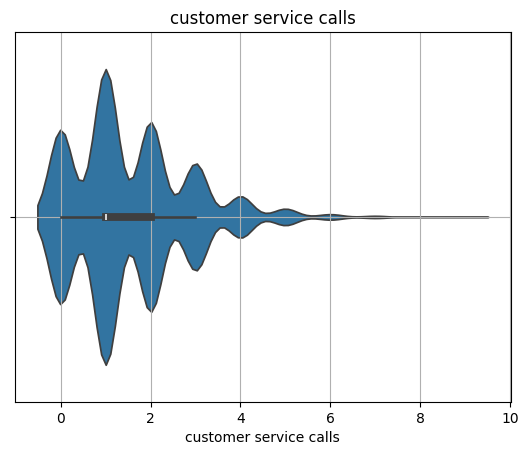

In [24]:
import seaborn as sns
sns.violinplot(x=df['customer service calls'])
plt.grid(True)
plt.title('customer service calls')
plt.show()

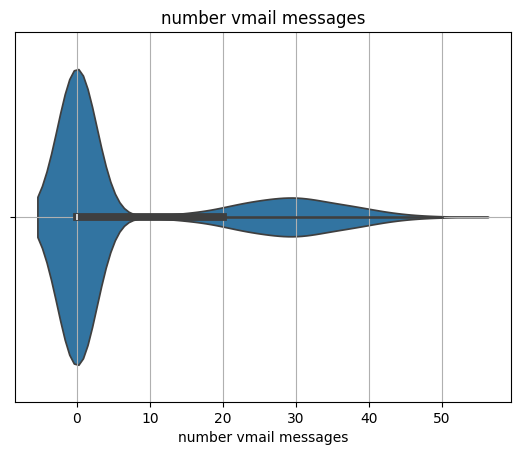

In [25]:
sns.violinplot(x=df['number vmail messages'])
plt.grid(True)
plt.title('number vmail messages')
plt.show()

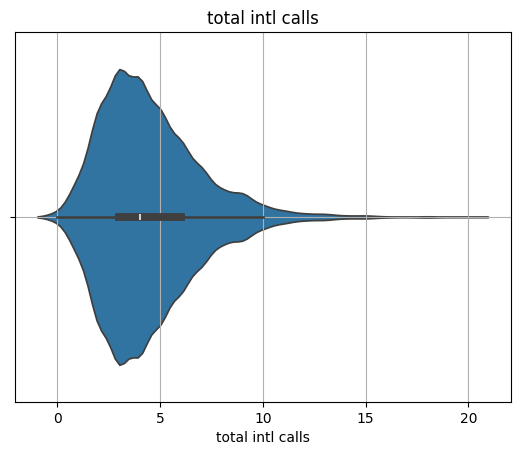

In [26]:
sns.violinplot(x=df['total intl calls'])
plt.grid(True)
plt.title('total intl calls')
plt.show()

Since these 3 do not follow a normally distribution we will have to apply transformation to use ml algos which require inherently normally distributed data

In [27]:
#checking the categorical distribution
categorical_features = df.select_dtypes(include='object')
categorical_features.drop(columns='state',inplace=True)

/var/folders/g0/1x0t77h54x3bhyhhrv46l29r0000gn/T/ipykernel_1772/1834370543.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')
/var/folders/g0/1x0t77h54x3bhyhhrv46l29r0000gn/T/ipykernel_1772/1834370543.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')
/var/folders/g0/1x0t77h54x3bhyhhrv46l29r0000gn/T/ipykernel_1772/1834370543.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')


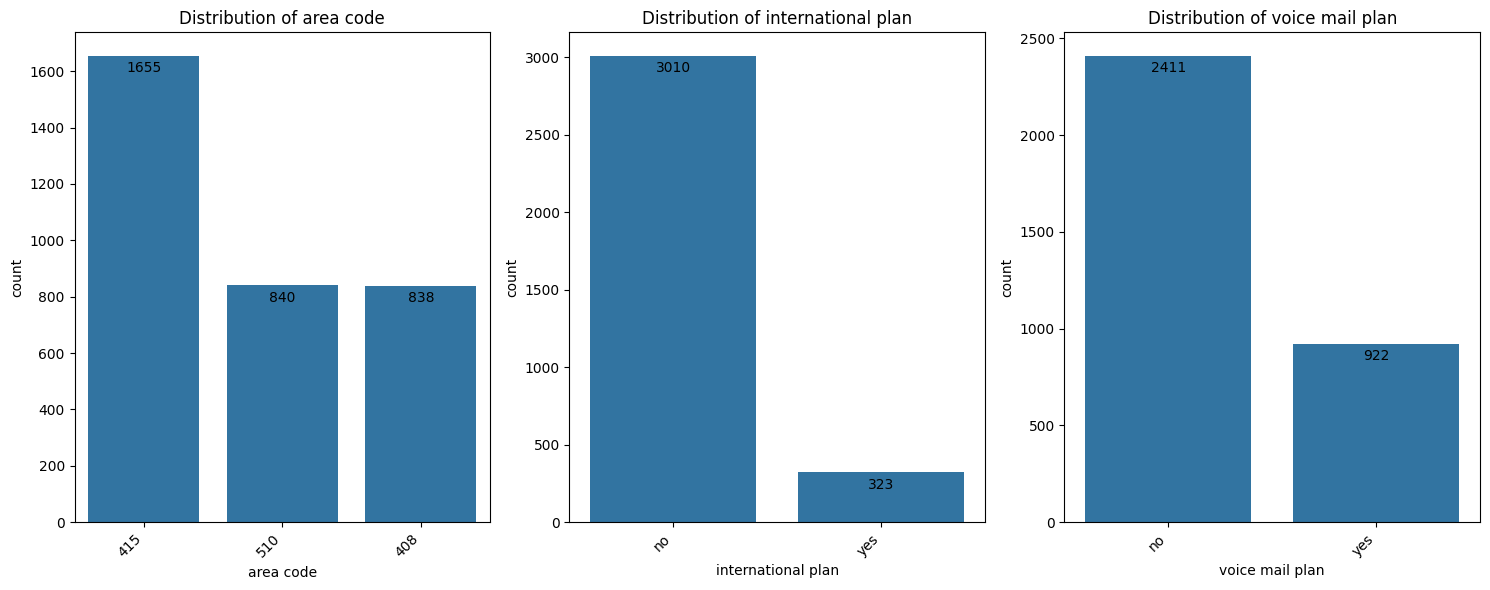

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs = axs.flatten()
# palette = sns.color_palette("Set2")
for i, feature in enumerate(categorical_features[:10]):
    plot = sns.countplot(x=df[feature], ax=axs[i], order=df[feature].value_counts().index)

    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, -9), textcoords = 'offset points')

    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

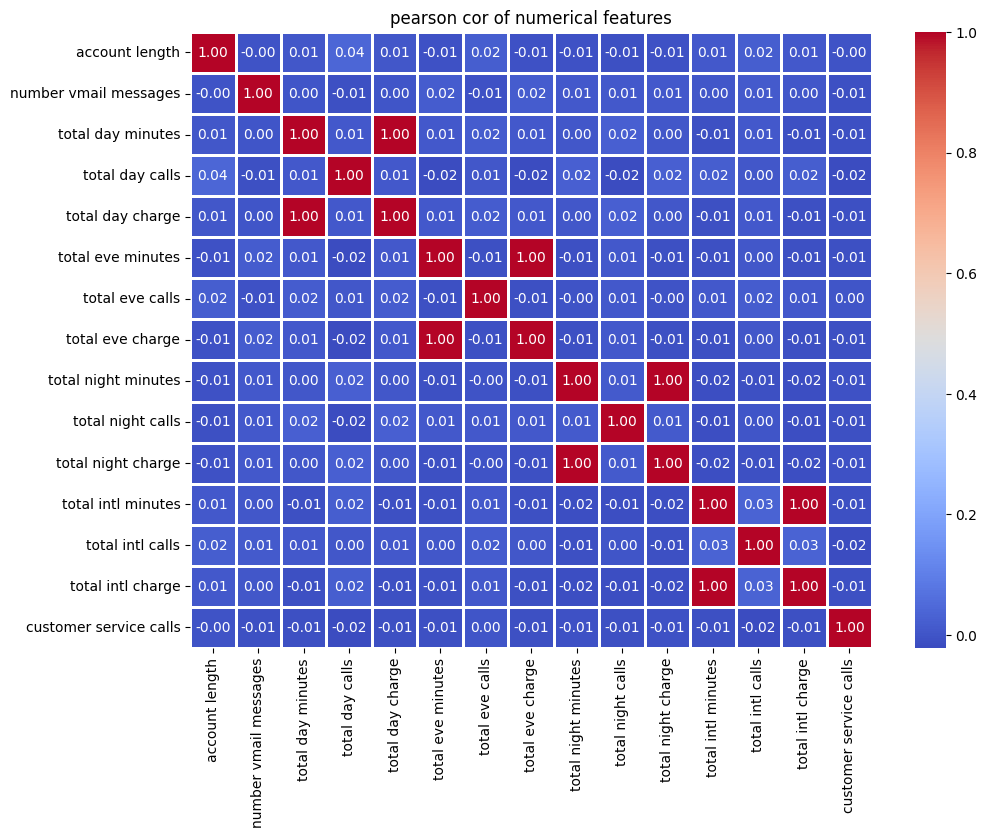

In [29]:
#plotting correlation
pearson_correlation = numerical_features.corr(method='pearson')
plt.figure(figsize=(11,8))
sns.heatmap(pearson_correlation,annot=True,fmt='.2f',cmap='coolwarm',linewidths=1)
plt.title('pearson cor of numerical features')
plt.show()

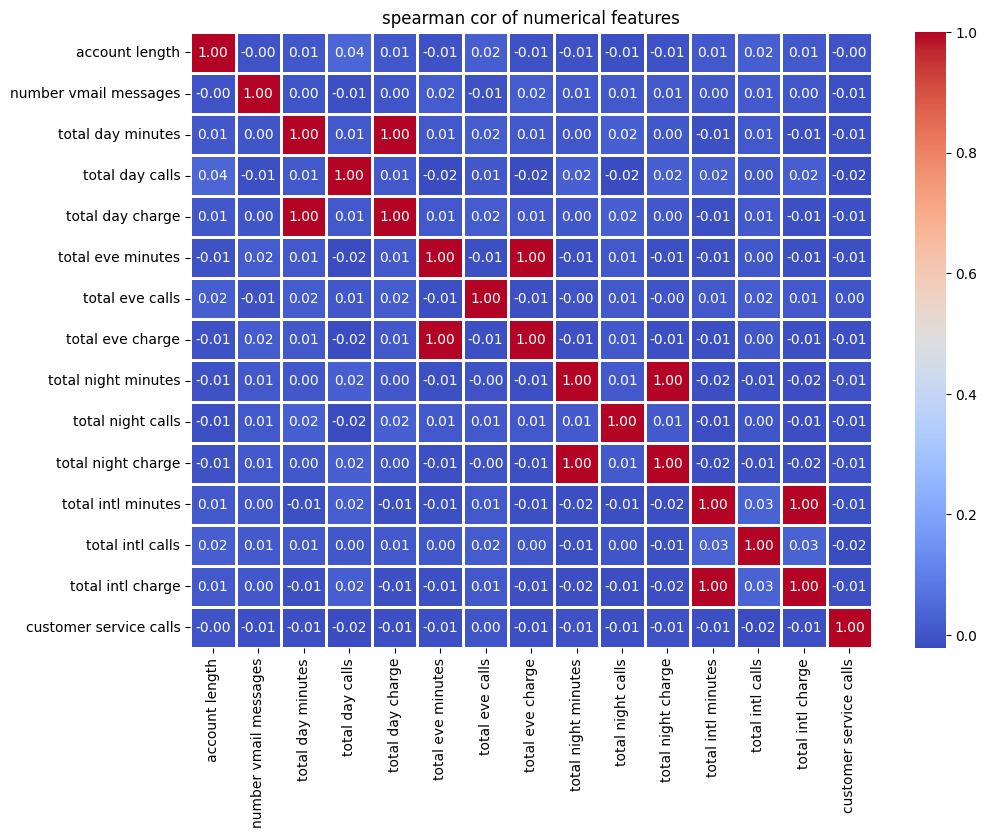

In [30]:
spearman_correlation = numerical_features.corr(method='pearson')
plt.figure(figsize=(11,8))
sns.heatmap(spearman_correlation,annot=True,fmt='.2f',cmap='coolwarm',linewidths=1)
plt.title('spearman cor of numerical features')
plt.show()

| Feature                          | **Pearson**                                                  | **Spearman**                                                             | **Kendall**                                                                 |
|----------------------------------|---------------------------------------------------------------|--------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Type of relationship**         | Linear                                                       | Monotonic (increasing/decreasing)                                       | Monotonic (based on concordant/discordant pairs)                            |
| **Data type**                    | Continuous (interval/ratio)                                  | Ordinal, ranked, or continuous                                           | Ordinal, ranked, or continuous                                              |
| **Assumes normality?**           | Yes (ideally)                                                | No                                                                       | No                                                                           |
| **Handles non-linearity?**       | ❌ No                                                        | ✅ Yes (monotonic trends)                                                | ✅ Yes (monotonic trends)                                                   |
| **Robust to outliers?**          | ❌ No                                                        | ✅ More robust                                                           | ✅ Most robust                                                               |
| **Based on**                     | Covariance of the variables                                  | Ranks of the variables                                                   | Number of concordant and discordant pairs                                   |
| **Use case**                     | Linear regression, continuous features                       | Non-parametric stats, feature selection                                 | Preference analysis, comparing ranked lists                                 |
| **Value range**                  | [-1, 1]                                                      | [-1, 1]                                                                  | [-1, 1]                                                                      |
| **Interpretable as**             | Strength & direction of linear relationship                  | Strength & direction of monotonic relationship                          | Probability of observing concordance between pairs                          |
| **Computation speed**            | Fast                                                         | Moderate                                                                 | Slow (especially for large datasets)                                        |
| **scipy function**               | `scipy.stats.pearsonr(x, y)`                                 | `scipy.stats.spearmanr(x, y)`                                            | `scipy.stats.kendalltau(x, y)`                                              |
| **Formula**                      | ![Pearson](https://latex.codecogs.com/png.image?\dpi{120}&space;r_{xy}=\frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2}\sqrt{\sum(y_i-\bar{y})^2}}) | ![Spearman](https://latex.codecogs.com/png.image?\dpi{120}&space;r_s=1-\frac{6\sum{d_i^2}}{n(n^2-1)})| ![Kendall](https://latex.codecogs.com/png.image?\dpi{120}&space;\tau=\frac{(C-D)}{\frac{1}{2}n(n-1)}) |

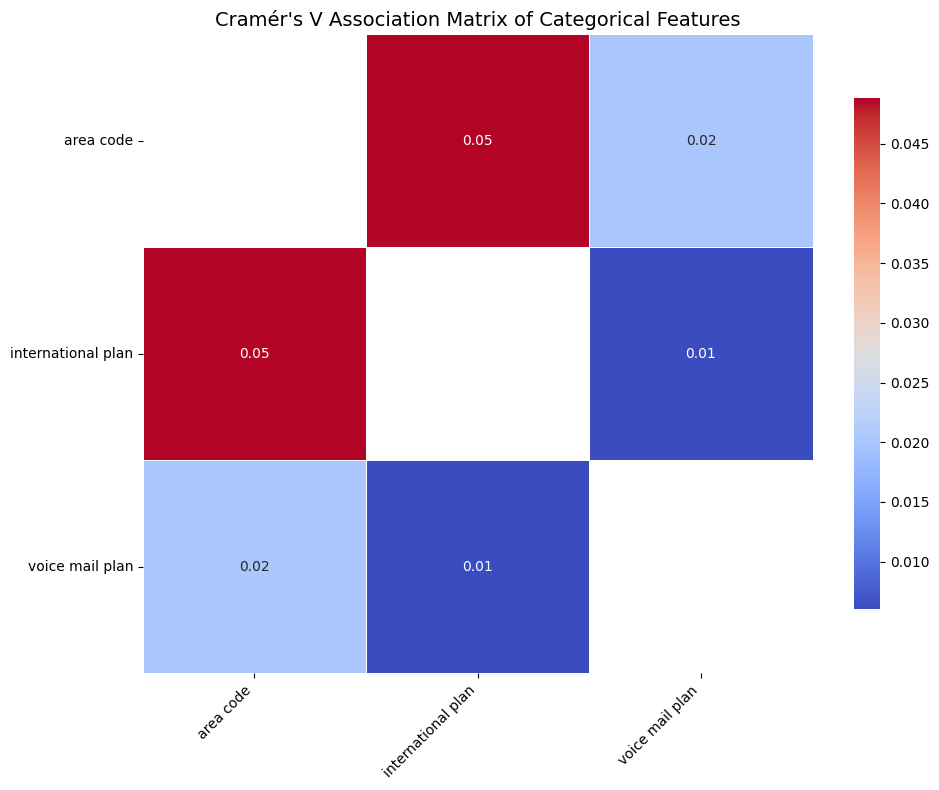

In [33]:
#association of categorical variables
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1))) if min(r, k) > 1 else 0

cat_cols = categorical_features.columns.tolist()


cramers_v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = np.nan  # Self-correlation not useful
        else:
            value = cramers_v(categorical_features[col1], categorical_features[col2])
            cramers_v_matrix.loc[col1, col2] = value


plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .8})
plt.title("Cramér's V Association Matrix of Categorical Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

some other ways of checking association with cat vars

In [35]:
from sklearn.metrics import mutual_info_score
mutual_info_score(df['area code'], df['international plan'])* 100

0.11434030367011988

<Axes: xlabel='area code'>

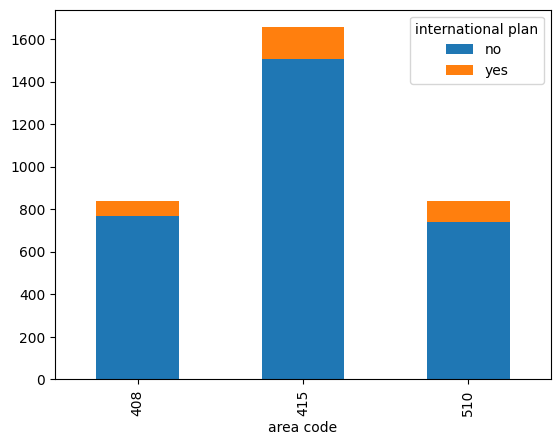

In [36]:
df.groupby(['area code', 'international plan']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='international plan', ylabel='area code'>

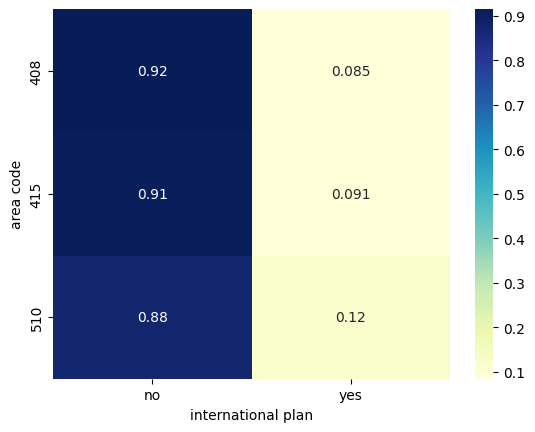

In [37]:
import seaborn as sns
table = pd.crosstab(df['area code'], df['international plan'], normalize='index')
sns.heatmap(table, annot=True, cmap="YlGnBu")

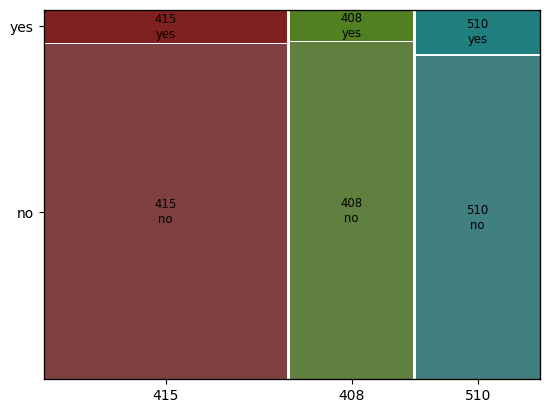

In [38]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['area code', 'international plan'])
plt.show()